# Customer Life-Time Value analysis

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
#runs only on jupyter notebook to show 
#visualizations in the notebook.

In [2]:
#Reading the data into a dataframe
df = pd.DataFrame(pd.read_csv('Data_Set_LTV Exercise.xlsx - Sheet2.csv'))

In [3]:
#just looking at the data
df.head()

,increment_id,status,created_at,customer_id,gross_order_revenue
0,200095401,complete,2/1/15 2:53,1000477,74.95
1,200095423,complete,2/1/15 6:04,1000478,84.95
2,200095430,complete,2/1/15 6:55,1000479,220.89
3,200095436,complete,2/1/15 7:41,1000480,182.99
4,200095440,complete,2/1/15 8:03,1000481,32.99


In [4]:
#Creating a new column to store month number from column-"created_at". 
#Function to do the above job.
lst = []
current_month_id = 0
def fun(x):
    x = x.split(' ')[0]
    m,d,y = x.split('/')
    key = str(m)+str(y)
    if key in lst:
        return lst.index(key)
    else:
        lst.append(key)
        return lst.index(key)    

#new column
df['month'] = df['created_at'].apply(fun)

In [5]:
#Now lets check how the data looks like
df

,increment_id,status,created_at,customer_id,gross_order_revenue,month
0,200095401,complete,2/1/15 2:53,1000477,74.95,0
1,200095423,complete,2/1/15 6:04,1000478,84.95,0
2,200095430,complete,2/1/15 6:55,1000479,220.89,0
3,200095436,complete,2/1/15 7:41,1000480,182.99,0
4,200095440,complete,2/1/15 8:03,1000481,32.99,0
5,200095472,complete,2/1/15 12:14,1000390,19.99,0
6,200095474,complete,2/1/15 12:15,1000482,65.00,0
7,200095476,complete,2/1/15 12:28,1000483,154.95,0
8,200095491,complete,2/1/15 14:33,1000484,260.95,0
9,200095497,complete,2/1/15 15:06,1000485,59.99,0


In [6]:
#some description about the data and values in it
df.describe()

,increment_id,customer_id,gross_order_revenue,month
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000
mean,1.966571e+08,1.008474e+06,187.958897,8.367042
std,3.244690e+07,4.927148e+03,284.424828,3.710212
min,2.200000e+01,1.000002e+06,0.000000,0.000000
25%,2.001148e+08,1.004198e+06,54.950000,6.000000
50%,2.029048e+08,1.008239e+06,105.000000,10.000000
75%,2.029190e+08,1.012751e+06,205.950000,11.000000
max,3.000013e+08,1.017394e+06,7496.950000,13.000000


In [7]:
#some information about the type of data for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
increment_id           21597 non-null int64
status                 21597 non-null object
created_at             21597 non-null object
customer_id            21597 non-null int64
gross_order_revenue    21597 non-null float64
month                  21597 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 1012.4+ KB


In [8]:
#Counting the number of customers in each month 
#(customer-id duplicates included)
df.groupby('month')['customer_id'].count()

month
0      911
1      759
2      820
3      923
4      727
5      860
6      814
7      865
8      995
9     2701
10    4771
11    1818
12    2818
13    1815
Name: customer_id, dtype: int64

In [9]:
#Counting the number of unique customers in each month 
#(customer-id duplicates Excluded)
df.groupby('month')['customer_id'].nunique()

month
0      879
1      730
2      787
3      877
4      704
5      829
6      785
7      822
8      927
9     2488
10    4363
11    1621
12    2569
13    1632
Name: customer_id, dtype: int64

In [10]:
#Checking the number of different purchases each customer made. 
#Looks like there are decent amount of customers 
#who purchased more than once.But, we dont know if these 
#customers purchased in the month of February-2015 or not
df.customer_id.value_counts()

1000962    30
1006421    19
1004736    15
1006191    14
1001159    13
1004564    12
1007663    12
1006001    12
1012119    12
1004834    12
1000378    12
1005926    11
1001745    11
1001059    10
1001160    10
1013539     9
1006366     9
1008317     9
1000905     9
1001016     9
1001631     9
1007037     9
1003200     8
1007883     8
1014333     8
1006632     8
1007554     8
1002677     8
1006474     8
1002643     8
           ..
1005889     1
1003904     1
1001827     1
1016186     1
1010039     1
1007990     1
1014133     1
1012084     1
1001843     1
1005937     1
1003888     1
1010023     1
1007974     1
1014117     1
1012068     1
1005921     1
1001795     1
1003872     1
1016154     1
1010007     1
1014101     1
1012052     1
1001811     1
1005905     1
1003856     1
1016138     1
1007942     1
1014085     1
1012036     1
1001481     1
Name: customer_id, dtype: int64

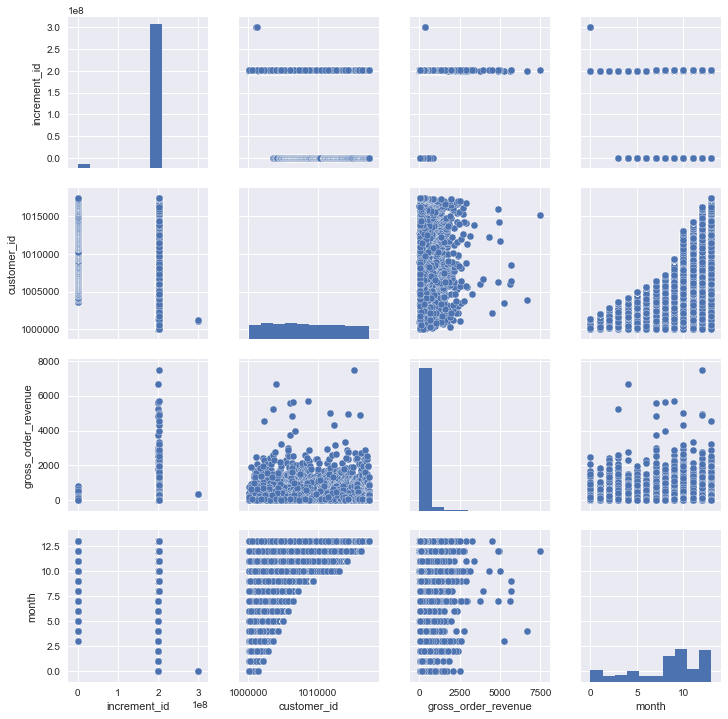

In [11]:
#Visualizing how each column is related to other in the dataset.
#From the below visualization, there is no much information useful for us now, 
#but we can see one thing that customers are increasing  over the months which is a good thing.
sns.pairplot(df)

In [12]:
#new dataframe to store cutomers and associated frquency of purchases.
df_frequency= df.groupby('customer_id').size().sort_values(ascending=False).reset_index(name='number of times Purchased')

In [13]:
df_frequency


,customer_id,number of times Purchased
0,1000962,30
1,1006421,19
2,1004736,15
3,1006191,14
4,1001159,13
5,1007663,12
6,1004834,12
7,1012119,12
8,1006001,12
9,1000378,12


In [14]:
#inner-joining 2 dataframes on customer-ID and storing it in 
#new dataframe called df_total. So now I know the customer_id, 
#number_of_times_purchased and on which months he purchased.
df_total = pd.merge(df, df_frequency, on='customer_id', how='inner')

In [15]:
#creating a temporary dataframe called df_feb15 to store 
#customer-id's of customers who purchased at least once in feb-2015
df_feb15=df_total[df_total['month']==0]

In [16]:
#Now we need to know who are the customers who purchased in Feb-2015, 
#For that,do outer join on df_feb15 and df_total dataframes on 
#customer_id the reason for doing outer join and setting 'indicator'
#parameter as 'True' is because I dont need customers who did not 
#purchase in feb - 2015.

df_tot = pd.merge(df_feb15, df_total,on='customer_id', how='outer',indicator=True)

In [17]:
#customers who did not purchased in feb-2015 dont have 
#a value in number of times purchased_X column
df_tot = df_tot[np.isfinite(df_tot['number of times Purchased_x'])]

In [18]:
#This is our required data to do further analysis
#looks like we ended up with 1450 rows
df_tot[df_tot['_merge']=='both']

,increment_id_x,status_x,created_at_x,customer_id,gross_order_revenue_x,month_x,number of times Purchased_x,increment_id_y,status_y,created_at_y,gross_order_revenue_y,month_y,number of times Purchased_y,_merge
0,200095401.0,complete,2/1/15 2:53,1000477,74.95,0.0,2.0,200095401,complete,2/1/15 2:53,74.95,0,2,both
1,200095401.0,complete,2/1/15 2:53,1000477,74.95,0.0,2.0,200016175,complete,3/7/15 19:44,124.95,1,2,both
2,200095423.0,complete,2/1/15 6:04,1000478,84.95,0.0,1.0,200095423,complete,2/1/15 6:04,84.95,0,1,both
3,200095430.0,complete,2/1/15 6:55,1000479,220.89,0.0,1.0,200095430,complete,2/1/15 6:55,220.89,0,1,both
4,200095436.0,complete,2/1/15 7:41,1000480,182.99,0.0,1.0,200095436,complete,2/1/15 7:41,182.99,0,1,both
5,200095440.0,complete,2/1/15 8:03,1000481,32.99,0.0,1.0,200095440,complete,2/1/15 8:03,32.99,0,1,both
6,200095472.0,complete,2/1/15 12:14,1000390,19.99,0.0,1.0,200095472,complete,2/1/15 12:14,19.99,0,1,both
7,200095474.0,complete,2/1/15 12:15,1000482,65.00,0.0,1.0,200095474,complete,2/1/15 12:15,65.00,0,1,both
8,200095476.0,complete,2/1/15 12:28,1000483,154.95,0.0,2.0,200095476,complete,2/1/15 12:28,154.95,0,2,both
9,200095476.0,complete,2/1/15 12:28,1000483,154.95,0.0,2.0,202921108,complete,1/28/16 21:57,54.95,11,2,both


In [19]:
#confirming that we did not take customers 
#who did not purchase in feb-2015
df_tot[df_tot['_merge']!='both'].count()

increment_id_x                 0
status_x                       0
created_at_x                   0
customer_id                    0
gross_order_revenue_x          0
month_x                        0
number of times Purchased_x    0
increment_id_y                 0
status_y                       0
created_at_y                   0
gross_order_revenue_y          0
month_y                        0
number of times Purchased_y    0
_merge                         0
dtype: int64

In [20]:
#changing the name of dataframe(just for comfort!)
#we dont need some columns from the dataframe like,
#increment_id, status. But I am not removing them because,
#we may need status in a situation where 
#we have'Incomplete'&'Complete' values to filter records.
df_total = df_tot
df_total

,increment_id_x,status_x,created_at_x,customer_id,gross_order_revenue_x,month_x,number of times Purchased_x,increment_id_y,status_y,created_at_y,gross_order_revenue_y,month_y,number of times Purchased_y,_merge
0,200095401.0,complete,2/1/15 2:53,1000477,74.95,0.0,2.0,200095401,complete,2/1/15 2:53,74.95,0,2,both
1,200095401.0,complete,2/1/15 2:53,1000477,74.95,0.0,2.0,200016175,complete,3/7/15 19:44,124.95,1,2,both
2,200095423.0,complete,2/1/15 6:04,1000478,84.95,0.0,1.0,200095423,complete,2/1/15 6:04,84.95,0,1,both
3,200095430.0,complete,2/1/15 6:55,1000479,220.89,0.0,1.0,200095430,complete,2/1/15 6:55,220.89,0,1,both
4,200095436.0,complete,2/1/15 7:41,1000480,182.99,0.0,1.0,200095436,complete,2/1/15 7:41,182.99,0,1,both
5,200095440.0,complete,2/1/15 8:03,1000481,32.99,0.0,1.0,200095440,complete,2/1/15 8:03,32.99,0,1,both
6,200095472.0,complete,2/1/15 12:14,1000390,19.99,0.0,1.0,200095472,complete,2/1/15 12:14,19.99,0,1,both
7,200095474.0,complete,2/1/15 12:15,1000482,65.00,0.0,1.0,200095474,complete,2/1/15 12:15,65.00,0,1,both
8,200095476.0,complete,2/1/15 12:28,1000483,154.95,0.0,2.0,200095476,complete,2/1/15 12:28,154.95,0,2,both
9,200095476.0,complete,2/1/15 12:28,1000483,154.95,0.0,2.0,202921108,complete,1/28/16 21:57,54.95,11,2,both


In [21]:
#Lets see some details about the new dataframe
#here the columns with '_x' are from df_feb15 and
#'_y' are from df_total
#which means month_x has only 0 value and 
#month_y has 0 to 13 values

df_total.info()
df_total.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 14 columns):
increment_id_x                 1450 non-null float64
status_x                       1450 non-null object
created_at_x                   1450 non-null object
customer_id                    1450 non-null int64
gross_order_revenue_x          1450 non-null float64
month_x                        1450 non-null float64
number of times Purchased_x    1450 non-null float64
increment_id_y                 1450 non-null int64
status_y                       1450 non-null object
created_at_y                   1450 non-null object
gross_order_revenue_y          1450 non-null float64
month_y                        1450 non-null int64
number of times Purchased_y    1450 non-null int64
_merge                         1450 non-null category
dtypes: category(1), float64(5), int64(4), object(4)
memory usage: 160.0+ KB


,increment_id_x,customer_id,gross_order_revenue_x,month_x,number of times Purchased_x,increment_id_y,gross_order_revenue_y,month_y,number of times Purchased_y
count,1.450000e+03,1.450000e+03,1450.000000,1450.0,1450.000000,1.450000e+03,1450.000000,1450.000000,1450.000000
mean,2.004420e+08,1.000900e+06,158.217966,0.0,3.593103,2.007794e+08,163.097752,2.582759,3.593103
std,5.858415e+06,2.581881e+02,183.542372,0.0,5.909131,3.849645e+06,191.916210,4.337915,5.909131
min,2.000042e+08,1.000002e+06,12.890000,0.0,1.000000,2.000042e+08,0.000000,0.000000,1.000000
25%,2.000966e+08,1.000706e+06,59.950000,0.0,1.000000,2.000967e+08,59.912500,0.000000,1.000000
50%,2.000970e+08,1.000932e+06,109.940000,0.0,2.000000,2.000991e+08,109.990000,0.000000,2.000000
75%,2.000991e+08,1.001108e+06,179.990000,0.0,3.000000,2.001112e+08,194.990000,4.000000,3.000000
max,3.000013e+08,1.001341e+06,2495.000000,0.0,30.000000,3.000013e+08,2495.000000,13.000000,30.000000


In [22]:
#Calculating the total gross order revenue by summing all values
#we know that df_total contains only data about customers of feb-2015
All_customers_gross_order_revenue = df_total['gross_order_revenue_y'].sum()

In [23]:
#Gross Orger Revenue for all customers
All_customers_gross_order_revenue

236491.7400000016

In [24]:
#Calculating LTV for all customers by dividing gross order revenue 
#by total number of unique customers
LTV_all_customers ='$'+str(round(All_customers_gross_order_revenue/df_total.customer_id.nunique(),2))
LTV_all_customers

'$269.05'

In [25]:
#Result is a auxiliary dataframe to store output values 
result= pd.DataFrame()

In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [27]:
#Output is the dataframe to store the final output values
output=pd.DataFrame(['All Customers','100%','100%',LTV_all_customers]).T

In [28]:
#calculating perentage of customers for "One Time Customers" 
# (number of customers who purchased only once) over (number of total customers)
percent_of_customers = ((df_total[df_total['number of times Purchased_y']==1]['customer_id'].nunique()) \
                                                                    /df_total.customer_id.nunique())*100

In [29]:
#calculating perentage of Revenue for "One Time Customers"
# (sum of gross revenue by one time customers) over (Total gross revenue)
percent_of_revenue = ((df_total[df_total['number of times Purchased_y']==1]['gross_order_revenue_y'].sum()) \
                                                                    /All_customers_gross_order_revenue)*100

In [30]:
#calculating LTV for "One Time Customers"
# (sum of gross revenue by one time customers) over (Number of unique one-Time customers)
LTV = ((df_total[df_total['number of times Purchased_y']==1]['gross_order_revenue_y'].sum()) \
                       /(df_total[df_total['number of times Purchased_y']==1]['customer_id'].nunique()))

In [31]:
#formatting the values for the output
percent_of_customers = str(round(percent_of_customers,2))+'%'
percent_of_revenue = str(round(percent_of_revenue,2))+'%'
LTV= '$'+str(round(LTV,2))
percent_of_customers, percent_of_revenue, LTV

('73.95%', '50.13%', '$182.4')

In [32]:
#Adding one record to result and later concatinating this dataframe 
#with output dataframe
result=pd.DataFrame(['one_Time Customers',percent_of_customers, percent_of_revenue, LTV]).T

In [33]:
#Concatinating final output with each record as dataframe
output = pd.concat([output,result])

In [34]:
#current status of our output. 
#Please ignore the index and column names for now
output

,0,1,2,3
0,All Customers,100%,100%,$269.05
0,one_Time Customers,73.95%,50.13%,$182.4


In [35]:
#list of frequencies from the df_total dataframe. 
#This is used to iterate over each frequency and adding them to output
freq_list = df_total['number of times Purchased_y'].unique()
freq_list.sort()

In [36]:
#This is a loop to calculate for every frequency and store in the output dataframe

for i in range(1,len(freq_list)):
    percent_of_customers = ((df_total[df_total['number of times Purchased_y']>=freq_list[i]]['customer_id'].nunique()) \
                                                                            /df_total.customer_id.nunique())*100
    
    percent_of_revenue = ((df_total[df_total['number of times Purchased_y']>=freq_list[i]]['gross_order_revenue_y'].sum()) \
                                                                            /All_customers_gross_order_revenue)*100
    
    LTV = ((df_total[df_total['number of times Purchased_y']>=freq_list[i]]['gross_order_revenue_y'].sum()) \
                                /(df_total[df_total['number of times Purchased_y']>=freq_list[i]]['customer_id'].nunique()))
    
    percent_of_customers = str(round(percent_of_customers,2))+'%'
    
    percent_of_revenue = str(round(percent_of_revenue,2))+'%'
    
    LTV= '$'+str(round(LTV,2))
    
    results=pd.DataFrame(['>'+str(freq_list[i-1])+' Customers',percent_of_customers, percent_of_revenue, LTV]).T
    
    output = pd.concat([output,results])
    

In [37]:
#Now working on the appearance (indexes and column names)

output.columns = ['Customer Type','% of customers','% of Revenue','LTV(GMV)']
output.reset_index(drop=True,inplace =True)
output

,Customer Type,% of customers,% of Revenue,LTV(GMV)
0,All Customers,100%,100%,$269.05
1,one_Time Customers,73.95%,50.13%,$182.4
2,>1 Customers,26.05%,49.87%,$514.99
3,>2 Customers,10.13%,27.44%,$729.17
4,>3 Customers,4.32%,16.94%,$1054.55
5,>4 Customers,2.28%,11.64%,$1376.21
6,>5 Customers,1.37%,8.78%,$1730.49
7,>6 Customers,1.02%,5.86%,$1539.07
8,>7 Customers,0.68%,4.57%,$1800.61
9,>9 Customers,0.46%,3.9%,$2306.33


### This is the actual output which is similar to the one shown in the input document shared with me.

## Thank you!!